<a href="https://colab.research.google.com/github/ThePituLegend/RISCV-MISE/blob/main/Combinacionals_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 6

Els codis Gray i BCD es defineixen de la següent manera:

| Entrades<br>actives | Gray |
|:-------------------:|:----:|
|          0          | 0000 |
|          1          | 0001 |
|          2          | 0011 |
|          3          | 0010 |
|          4          | 0110 |
|          5          | 0111 |
|          6          | 0101 |
|          7          | 0100 |
|          8          | 1100 |
|          9          | 1101 |
|          10         | 1111 |
|          11         | 1110 |
|          12         | 1010 |
|          13         | 1011 |
|          14         | 1001 |
|          15         | 1000 |


| Entrades<br>actives |  BCD |
|:-------------------:|:----:|
|          0          | 0000 |
|          1          | 0001 |
|          2          | 0010 |
|          3          | 0011 |
|          4          | 0100 |
|          5          | 0101 |
|          6          | 0110 |
|          7          | 0111 |
|          8          | 1000 |
|          9          | 1001 |

Es defineix un codificador com:
* Dispositiu de $2^n$ entrades i $n$ sortides tal que quan l’entrada $k$ està activa, les sortides prenen el valor $k$.
* Només una entrada està activa en cada instant de temps.

In [1]:
# @title Carregar Py4Hw { display-mode: "form" }
# @markdown Des de GitHub

!pip install nbwavedrom                             &> /dev/null
!git clone https://github.com/ThePituLegend/py4hw   &> /dev/null
%cd /content/py4hw
from py4hw import *

if "py4hw" in dir():
  print("OK")
else:
  print("ERROR")

/content/py4hw
OK


In [14]:
# @title Blocs adicionals { display-mode: "form" }
# @markdown (*Or4* i *Or5*)

class Or4(Logic):
    def __init__(self, parent, name: str, a: Wire, b: Wire, c: Wire, d: Wire,
                 r: Wire):
        super().__init__(parent, name)
        self.a = self.addIn("a", a)
        self.b = self.addIn("b", b)
        self.c = self.addIn("c", c)
        self.d = self.addIn("d", d)
        self.r = self.addOut("r", r)

    def propagate(self):
        self.r.put(self.a.get() | self.b.get() | self.c.get() | self.d.get())

class Or5(Logic):
    def __init__(self, parent, name: str, a: Wire, b: Wire, c: Wire, d: Wire, e: Wire,
                 r: Wire):
        super().__init__(parent, name)
        self.a = self.addIn("a", a)
        self.b = self.addIn("b", b)
        self.c = self.addIn("c", c)
        self.d = self.addIn("d", d)
        self.e = self.addIn("e", e)
        self.r = self.addOut("r", r)

    def propagate(self):
        self.r.put(self.a.get() | self.b.get() | self.c.get() | self.d.get() | self.e.get())

## Dissenya un codificador BCD

Completa la següent classe amb la teva proposta de circuit.


In [55]:
class BCDenc(Logic):
  def __init__(self, parent: Logic, name: str, inp: Wire, z: Wire):
    super().__init__(parent, name)
    self.addIn("in[9:0]", inp)

    self.addOut("z[3:0]", z)

    inIn = self.wires("in", 10, 1)
    zIn = self.wires("z", 4, 1)

    Bits(self, "inIn", inp, inIn)
    Concatenate(self, "zIn", zIn, z) # [indx 0 => z3, indx 1 => z2, indx 2 => z1, indx 3 => z0]
    zIn = zIn[::-1] # [indx 0 => z0, indx 1 => z1, indx 2 => z2, indx 3 => z3]
    
    # TODO: Instancia els cables intermitjos que necessitis
                # Cap
    
    # TODO: Instancia els blocs funcionals que necesitis
    #Or(self, "in8 + in9", inIn[8], inIn[9], 
    #   zIn[3])  # Alumne (Correcte)
    Or(self, "in8 + in9", inIn[0], inIn[1], 
       zIn[3])  # Alumne (Incorrecte)
    Or4(self, "in4 + in5 + in6 + in7", inIn[4], inIn[5], inIn[6], inIn[7], 
        zIn[2]) # Alumne
    Or4(self, "in2 + in3 + in6 + in7", inIn[2], inIn[3], inIn[6], inIn[7], 
        zIn[1]) # Alumne
    Or5(self, "in1 + in3 + in5 + in7 + in9", 
        inIn[1], inIn[3], inIn[5], inIn[7], inIn[9], 
        zIn[0]) # Alumne

iter 1 cost: 0 True
iter 2 cost: 0 False


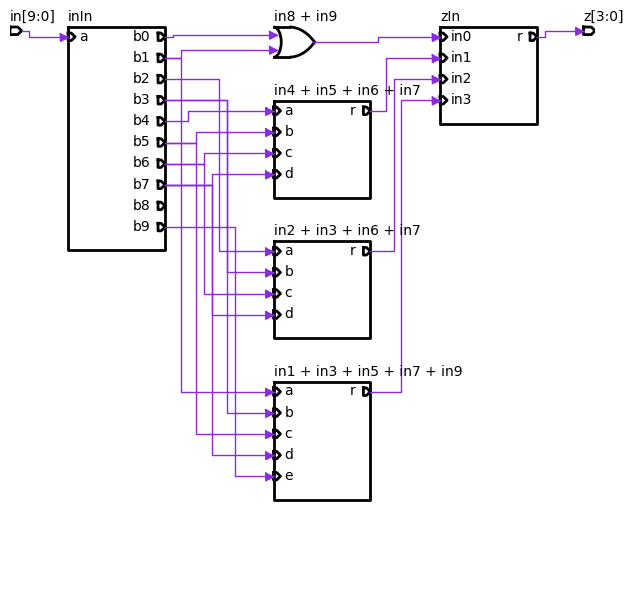

In [56]:
# @title Esquemàtic del circuit implementat { display-mode: "form" }

schm = HWSystem()

inp = schm.wire("in[9:0]", 10)
z = schm.wire("z[3:0]", 4)

circuit = BCDenc(schm, "BCD encoder", inp, z)

Schematic(circuit)

In [57]:
# @title És correcte el meu circuit? { display-mode: "form" }
# @markdown El teu circuit passarà una prova automatitzada per a comprovar la seva validesa.

from IPython.display import Markdown, display
pprint = lambda x: display(Markdown(x))

test = HWSystem()

inp = test.wire("in[9:0]", 10)
z = test.wire("z[3:0]", 4)

circuit = BCDenc(test, "BCD encoder", inp, z)


sol = [i for i in range(10)]

sol_w = test.wire("Solución", 4)
Sequence(test, "Solución", sol, sol_w)

Sequence(test, "in", [2**i for i in range(10)], inp)

wf = Waveform(test, "TEST", [inp, z, sol_w])

sim = test.getSimulator()

err = 0

for i, val in enumerate(sol):
  sim.clk(1)
  
  if z.get() != val:
    err += 1
    pprint(f"- **CLK {i+1}**: ¡Se esperaba **{val}** y se ha obtenido **{z.get()}**!")
    wf.waves[z]["wave"] =  wf.waves[z]["wave"][:-1] + "4"
  
if err == 0:
  pprint("**¡Circuito correcto!**")
else:
  pprint(f"**{err}** errores encontrados.")

draw_waveform(wf.get_waveform())    

- **CLK 1**: ¡Se esperaba **0** y se ha obtenido **8**!

- **CLK 2**: ¡Se esperaba **1** y se ha obtenido **9**!

- **CLK 9**: ¡Se esperaba **8** y se ha obtenido **0**!

- **CLK 10**: ¡Se esperaba **9** y se ha obtenido **1**!

**4** errores encontrados.

## Dissenya un conversor BCD-GRAY

Completa la següent classe amb la teva proposta de circuit.

**NOTA**: El bloc *Repeat* ens permet conectar un cable directament a un altre cable, sense cap lògica intermitja.

In [58]:
class BCD2GRAY(Logic):
  def __init__(self, parent: Logic, name: str, inp: Wire, z: Wire):
    super().__init__(parent, name)
    self.addIn("in[3:0]", inp)

    self.addOut("z[3:0]", z)

    inIn = self.wires("in", 4, 1)
    zIn = self.wires("z", 4, 1)

    Bits(self, "inIn", inp, inIn) # [indx 0 => in0, indx 1 => in1, indx 2 => in2, indx 3 => in3]
    Concatenate(self, "zIn", zIn, z) # [indx 0 => z3, indx 1 => z2, indx 2 => z1, indx 3 => z0]
    zIn = zIn[::-1] # [indx 0 => z0, indx 1 => z1, indx 2 => z2, indx 3 => z3]

    # TODO: Instancia els cables intermitjos que necessitis
    notIn0 = self.wire("~in0")                                  # Alumne
    notIn1 = self.wire("~in1")                                  # Alumne
    notIn2 = self.wire("~in2")                                  # Alumne

    in2nIn1 = self.wire("in2·~in1")                             # Alumne
    nIn2in1 = self.wire("~in2·in1")                             # Alumne
    in1nIn0 = self.wire("in1·~in0")                             # Alumne
    nIn1in0 = self.wire("~in1·in0")                             # Alumne
    
    # TODO: Instancia els blocs funcionals que necesitis
    Not(self, "~in0", inIn[0], notIn0)                          # Alumne
    Not(self, "~in1", inIn[1], notIn1)                          # Alumne
    Not(self, "~in2", inIn[2], notIn2)                          # Alumne

    Repeat(self, "in3", inIn[3], zIn[3])                        # Alumne
    
    #And(self, "in2·~in1", inIn[2], notIn1, in2nIn1)             # Alumne (Correcte)
    And(self, "in2·~in1", inIn[3], notIn0, in2nIn1)             # Alumne (Incorrecte)
    And(self, "~in2·in1", notIn2, inIn[1], nIn2in1)             # Alumne
    And(self, "in1·~in0", inIn[1], notIn0, in1nIn0)             # Alumne
    And(self, "~in1·in0", notIn1, inIn[0], nIn1in0)             # Alumne

    Or(self, "in3+in2", inIn[3], inIn[2], zIn[2])               # Alumne
    Or(self, "(in2·~in1)·(~in2·in1)", in2nIn1, nIn2in1, zIn[1]) # Alumne
    Or(self, "(in1·~in0)·(~in1·in0)", in1nIn0, nIn1in0, zIn[0]) # Alumne

iter 1 cost: 1 True
iter 2 cost: 1 False


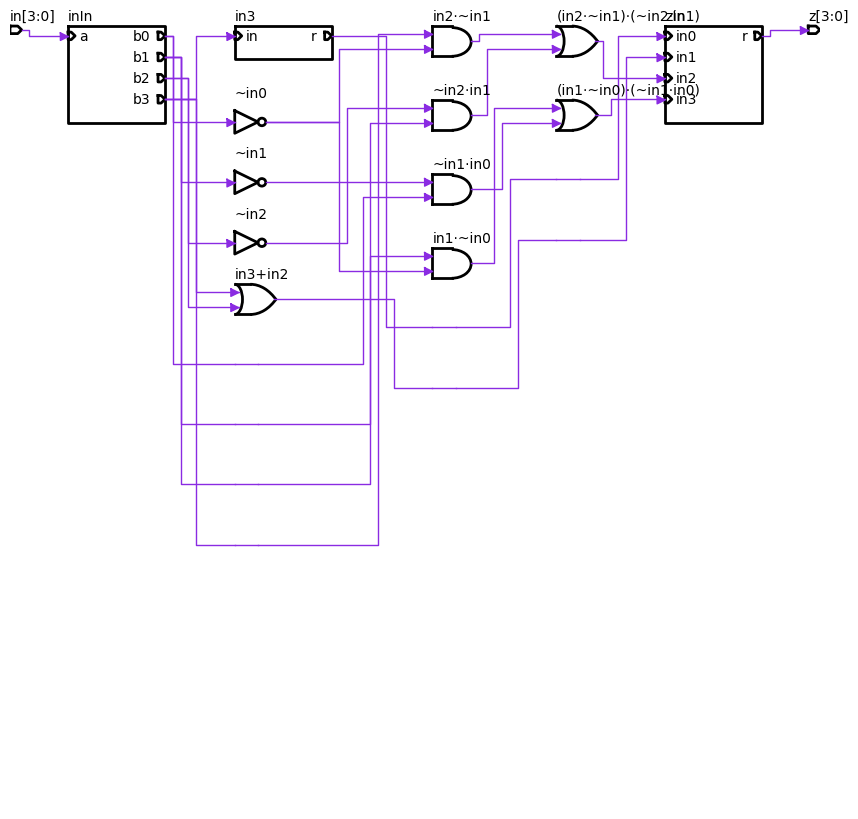

In [59]:
# @title Esquemàtic del circuit implementat { display-mode: "form" }

schm = HWSystem()

inp = schm.wire("in[3:0]", 4)
z = schm.wire("z[3:0]", 4)

circuit = BCD2GRAY(schm, "BCD-GRAY", inp, z)

Schematic(circuit)

In [60]:
# @title És correcte el meu circuit? { display-mode: "form" }
# @markdown El teu circuit passarà una prova automatitzada per a comprovar la seva validesa.

from IPython.display import Markdown, display
pprint = lambda x: display(Markdown(x))

test = HWSystem()

inp = test.wire("in[9:0]", 4)
z = test.wire("z[3:0]", 4)

circuit = BCD2GRAY(test, "BCD-GRAY", inp, z)


sol = [0, 1,
       3, 2,
       6, 7,
       5, 4,
       12, 13]

sol_w = test.wire("Solución", 4)
Sequence(test, "Solución", sol, sol_w)

Sequence(test, "in", [i for i in range(10)], inp)

wf = Waveform(test, "TEST", [inp, z, sol_w])

sim = test.getSimulator()

err = 0

for i, val in enumerate(sol):
  sim.clk(1)
  
  if z.get() != val:
    err += 1
    pprint(f"- **CLK {i+1}**: ¡Se esperaba **{val}** y se ha obtenido **{z.get()}**!")
    wf.waves[z]["wave"] =  wf.waves[z]["wave"][:-1] + "4"
  
if err == 0:
  pprint("**¡Circuito correcto!**")
else:
  pprint(f"**{err}** errores encontrados.")

draw_waveform(wf.get_waveform())    

- **CLK 5**: ¡Se esperaba **6** y se ha obtenido **4**!

- **CLK 6**: ¡Se esperaba **7** y se ha obtenido **5**!

- **CLK 9**: ¡Se esperaba **12** y se ha obtenido **14**!

**3** errores encontrados.